In [328]:
library(devtools)
unload('repr')
install_github('IRkernel/repr', force = TRUE)
library(repr)

Using GitHub PAT from the git credential store.





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/private/var/folders/k4/_tynxgnx6l39rvqmb6z2_mmh0000gn/T/RtmpI92B4F/remotes53725c4c7dfc/IRkernel-repr-8809fc9/DESCRIPTION’ ... OK
* preparing ‘repr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘repr_1.1.7.tar.gz’



Warning message in get(Info[i, 1], envir = env):
“internal error 1 in R_decompress1 with libdeflate”


ERROR: Error: package or namespace load failed for ‘repr’ in get(Info[i, 1], envir = env):
 lazy-load database '/opt/anaconda3/envs/OldNotebooks/lib/R/library/repr/R/repr.rdb' is corrupt


In [1]:
library(tidyverse)
library(glue)
library(devtools)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: usethis



In [2]:
install_github('yardsale8/purrrfect', force = TRUE)
library(purrrfect)

statistic <- map_vec

Using GitHub PAT from the git credential store.





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/private/var/folders/k4/_tynxgnx6l39rvqmb6z2_mmh0000gn/T/RtmpPfY36Q/remotes12abdb7e838f/yardsale8-purrrfect-09dd705/DESCRIPTION’ ... OK
* preparing ‘purrrfect’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘purrrfect_1.6.1.tar.gz’




Attaching package: ‘purrrfect’


The following objects are masked from ‘package:base’:

    replicate, tabulate




In [3]:
replicate(4, sample(1:4, 2, replace = TRUE))

.trial,.outcome
<dbl>,<list>
1,"2, 2"
2,"4, 2"
3,"3, 3"
4,"3, 2"


#### Some display function

In [4]:
round_double <- function(.data, digits = 4) {
    (.data
     %>% mutate_if(is.double, \(x) round(x, digits)))
}

In [5]:
round_tableau <- function(.data, digits = 4) {
    (.data
     %>% mutate_if(is.list, \(col) map(col, \(x) round(x, digits)))
     %>% mutate_if(is.double, \(x) round(x, digits))
    )
}

# `purrrfect` simulations

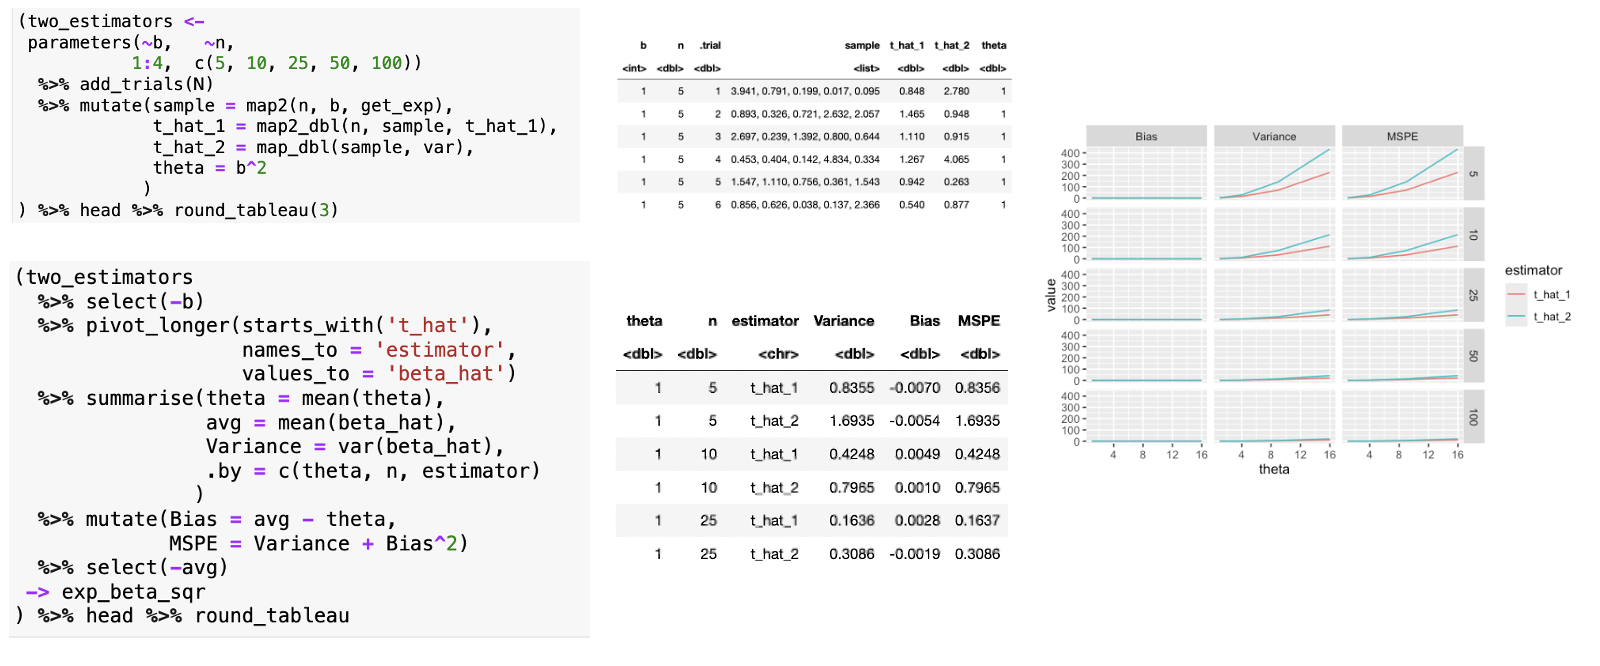

## What are `purrrfect` simulations?

- **`tidy`**: Extends `dplyr` & `purrr`
-  **Wholemeal:** Whole simulation $\longrightarrow$ one `tibble`
- **Helpful:** Adds convenient entry and exit tools

### Motivation - Wholemeal programming

> Wholemeal programming means to think
big: work with an entire list, rather than a sequence of elements; develop a solution space, rather than an individual solution <br>-- Ralf Hinze (2009)

[Source](https://www.cs.ox.ac.uk/ralf.hinze/publications/ICFP09.pdf)


### The experiment tableau units outimes and random variables

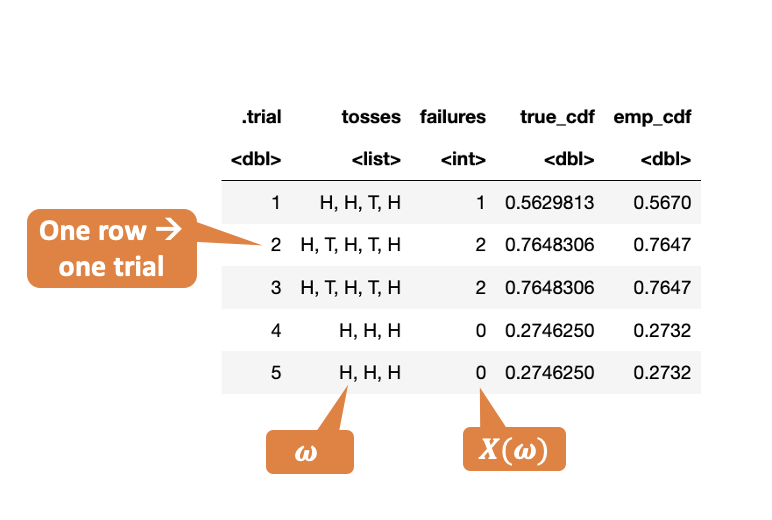

### The tableau allows students to compare observation to theory

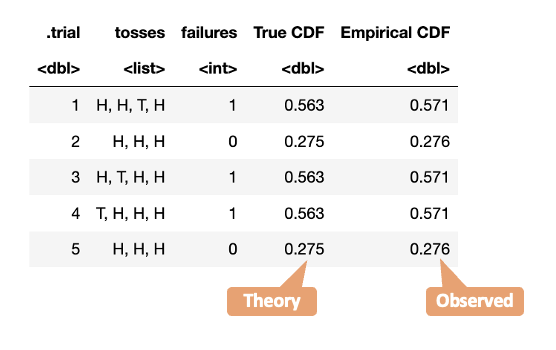

## The tableau reinforces concepts & good coding habits

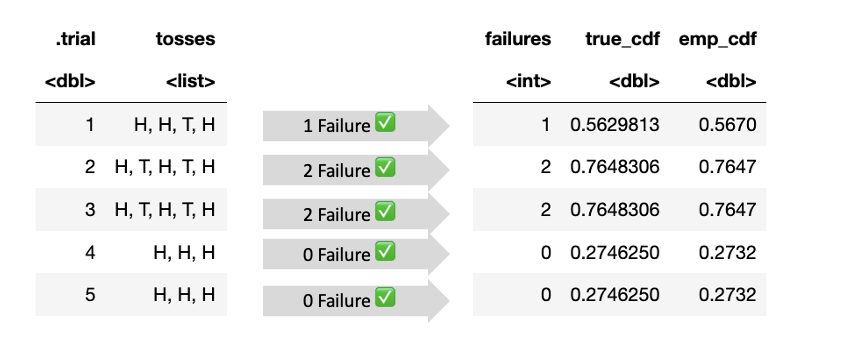

### Pipes encourage bite-sized coding

In [19]:
(dice_tableau <-
 replicate(10, sample(1:4, 2, replace = TRUE),
           .as = rolls)
#  %>% mutate(max = map_int(rolls, max))
#  %>% mutate(sum = map_int(rolls, sum))
#  %>% mutate(`max is more than 3` = max > 3)
) %>% head

.trial,rolls,max,sum,max is more than 3
<dbl>,<list>,<int>,<int>,<lgl>
1,"3, 1",3,4,FALSE
2,"2, 1",2,3,FALSE
3,"1, 4",4,5,TRUE
4,"2, 2",2,4,FALSE
5,"4, 4",4,8,TRUE
6,"1, 2",2,3,FALSE


### `purrrfect` provides convenient entry and exit points

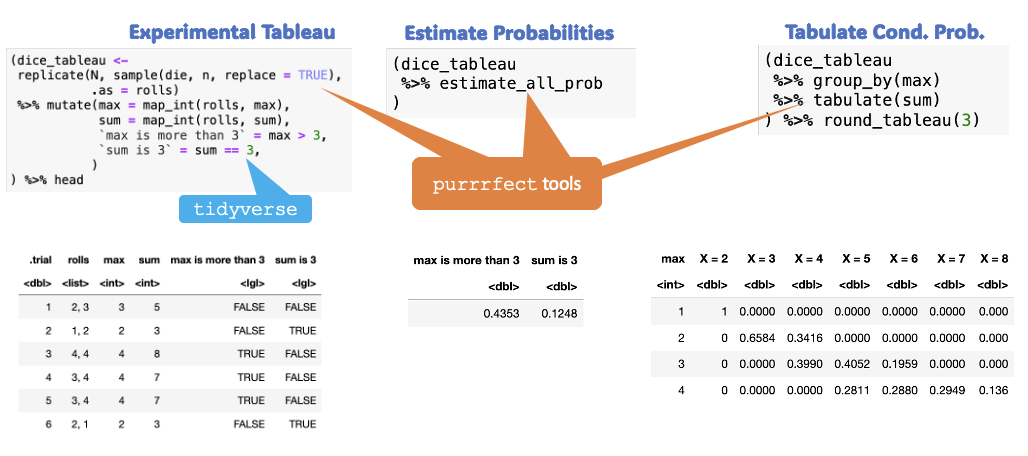

### Parametric simulations for a wholemeal approach

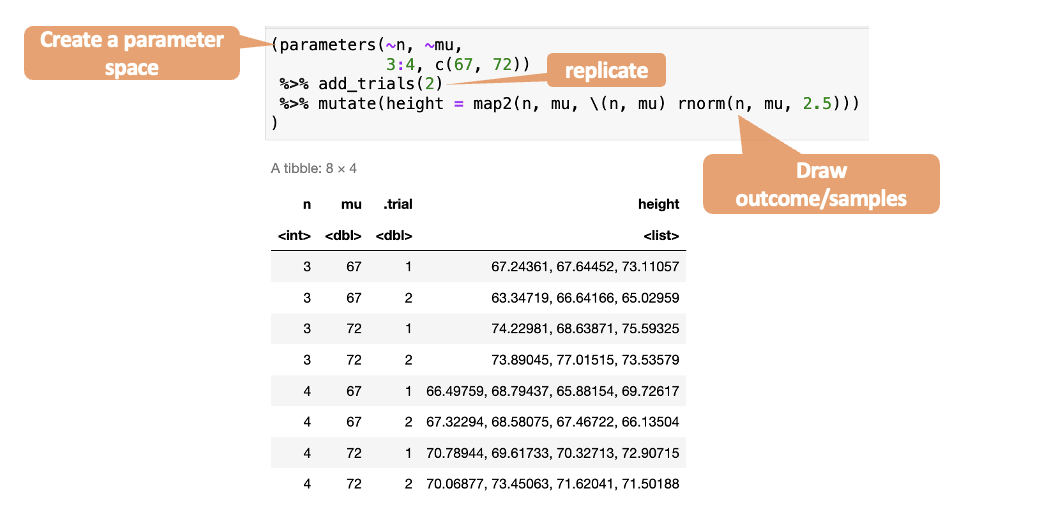

### Parametric simulation demonstration

In [15]:
(parameters(~n, ~mu,
            3:4, c(67, 72))
#  %>% add_trials(2)
#  %>% mutate(height = map2(n, mu, \(n, mu) rnorm(n, mu, 2.5)))
)

n,mu,.trial,height
<int>,<dbl>,<dbl>,<list>
3,67,1,"67.19459, 64.22230, 64.27971"
3,67,2,"68.56673, 67.76283, 67.10719"
3,72,1,"74.91378, 72.14675, 72.70987"
3,72,2,"70.62452, 68.94583, 72.33118"
4,67,1,"66.36523, 66.95912, 64.33814, 65.41926"
4,67,2,"72.55566, 67.24812, 68.19092, 64.26948"
4,72,1,"69.40472, 71.80226, 78.20292, 72.26766"
4,72,2,"73.20605, 72.34432, 73.41650, 75.61446"


## Example Simulations

### 1) Roll two 4-sided dice [Simple Probability]
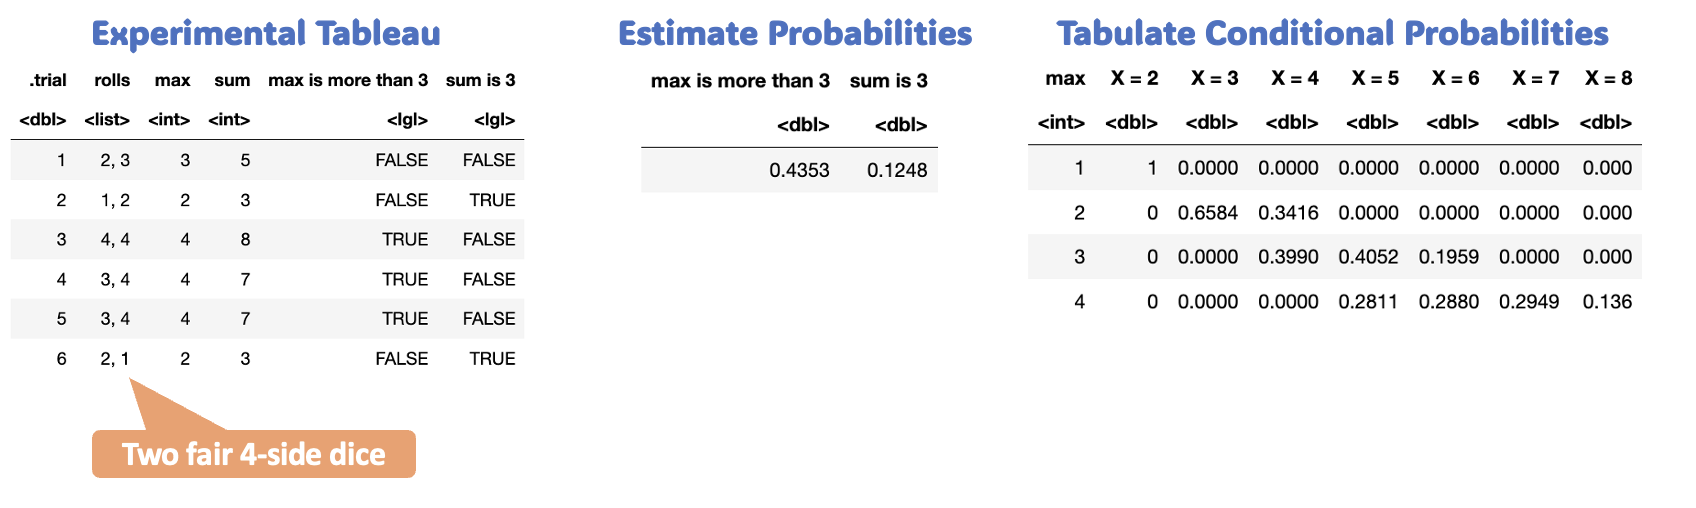

### 2) Waiting time problem & the negative binomial distribution

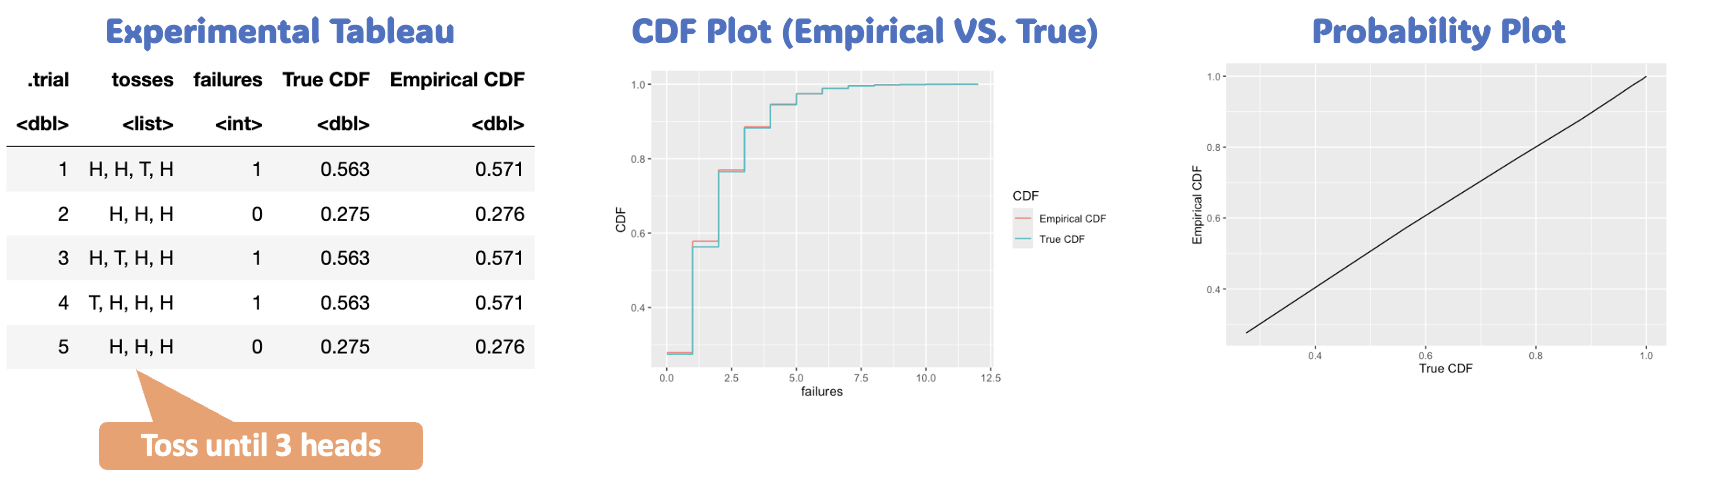

#### Useful models

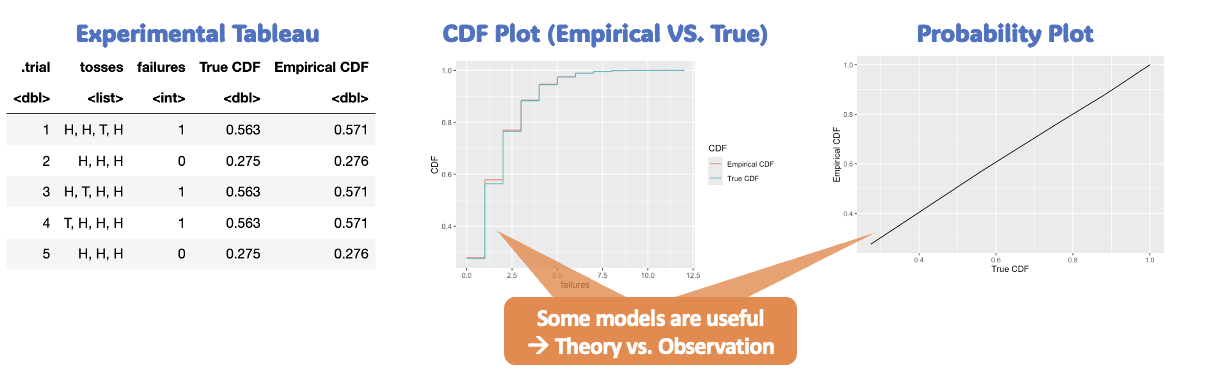

### 3) Distribution of Order Statistic [Parametric simulation]

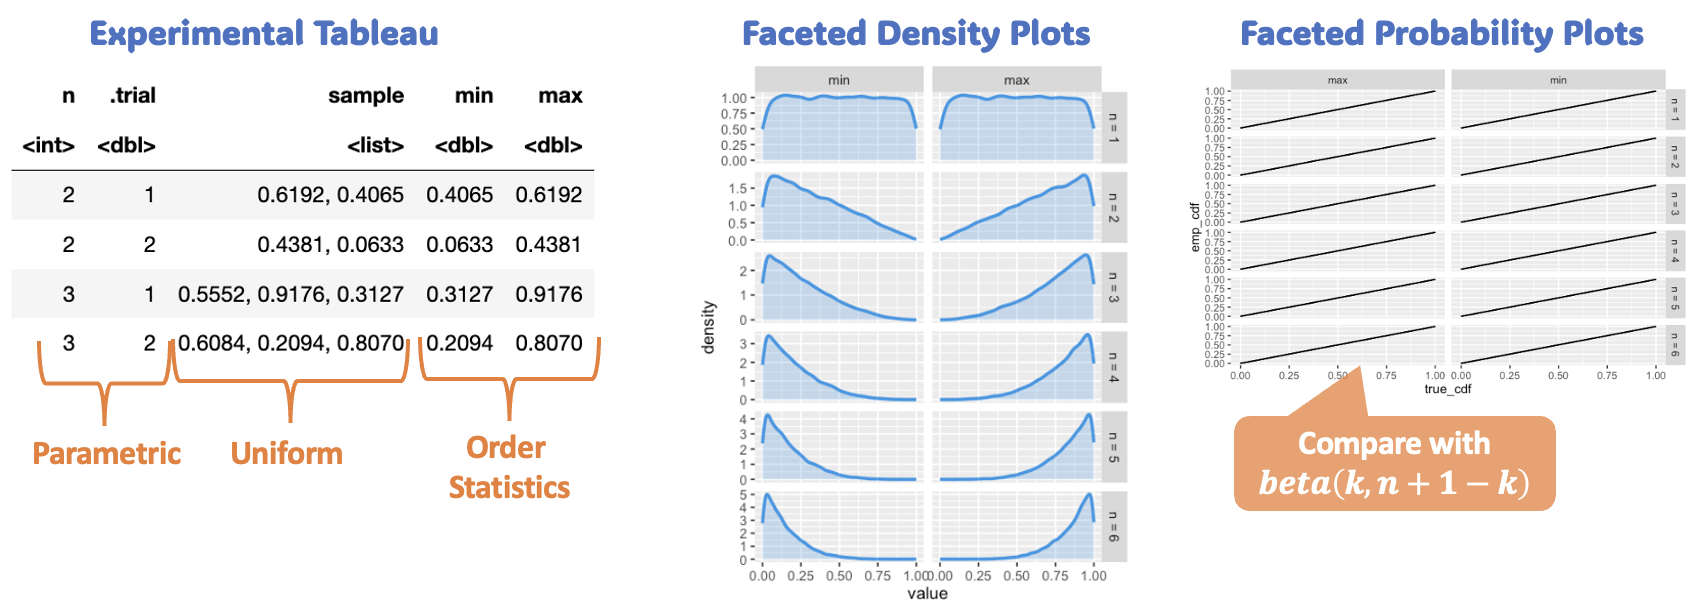

### 4) Comparing two estimators [Point estimation]

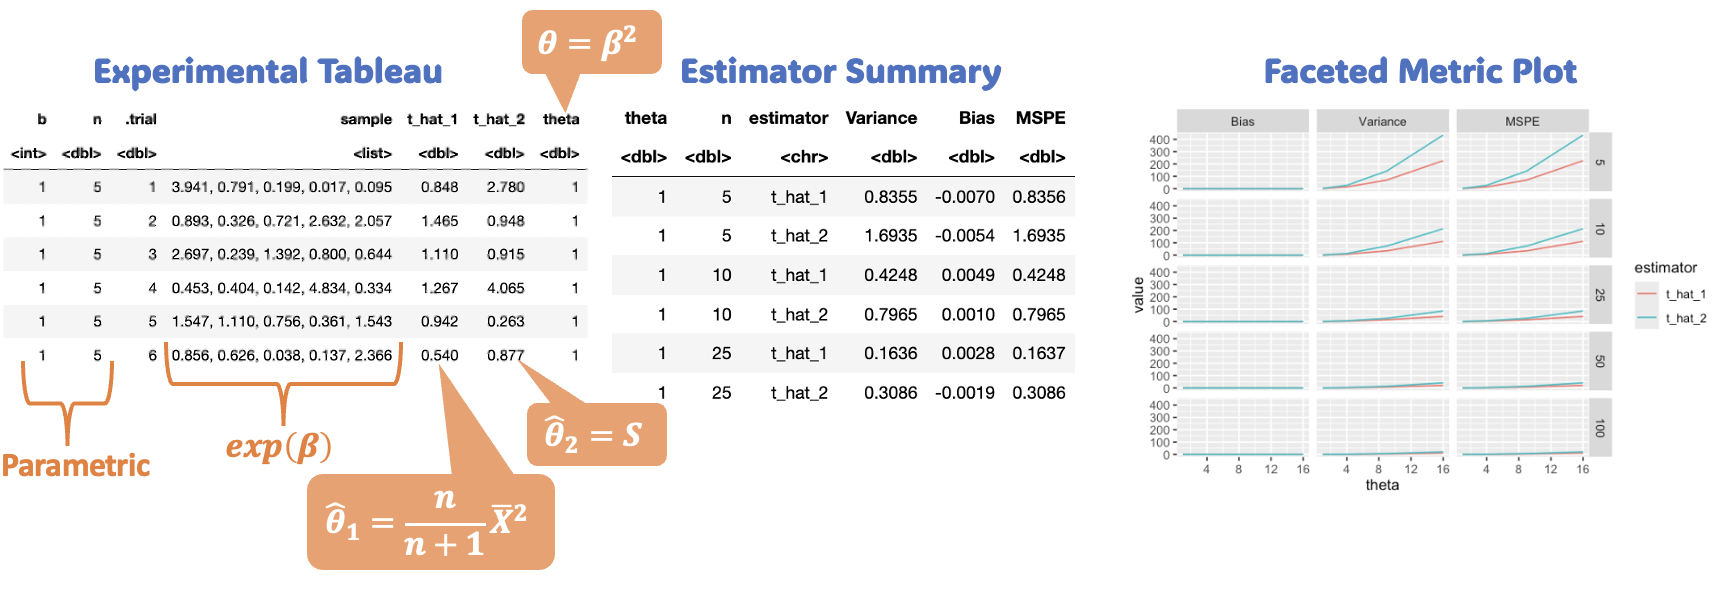

## Worked Examples

### Anatomy of a `purrrfect` simulation

1. Set up
2. Experimental tableau + summary table [as needed]
3. One or more exit points

### Example 1 -  Negative binomial and coin flips

- **Goal:** Relate coin flips to negative biomial
- Waiting time $\longrightarrow$ `sample_until`
- Initialize with `purrrfect::replicate`
- Plot a probability plot to verify distribution

In [ ]:
N <- 10000
k <- 3
p <- 0.65
three_heads <- \(x) num_successes(x, 'H') == 3
num_failures <- \(x) num_successes(x, 'T')
coin <- c('H', 'T')
ps <- c(p, 1 - p)

In [ ]:
(nb_tableau <-
 replicate(N, sample_until(coin, three_heads,
                           prob = ps,
                           replace = TRUE),
           .as = tosses)
 %>% mutate(failures = map_int(tosses, num_failures),
            `True CDF` = pnbinom(failures, k, p),
            `Empirical CDF` = cume_dist(failures))
) %>% head(5) %>% round_double(3)

.trial,tosses,failures,True CDF,Empirical CDF
<dbl>,<list>,<int>,<dbl>,<dbl>
1,"H, H, T, H",1,0.563,0.571
2,"H, H, H",0,0.275,0.276
3,"H, T, H, H",1,0.563,0.571
4,"T, H, H, H",1,0.563,0.571
5,"H, H, H",0,0.275,0.276


#### CDF plot

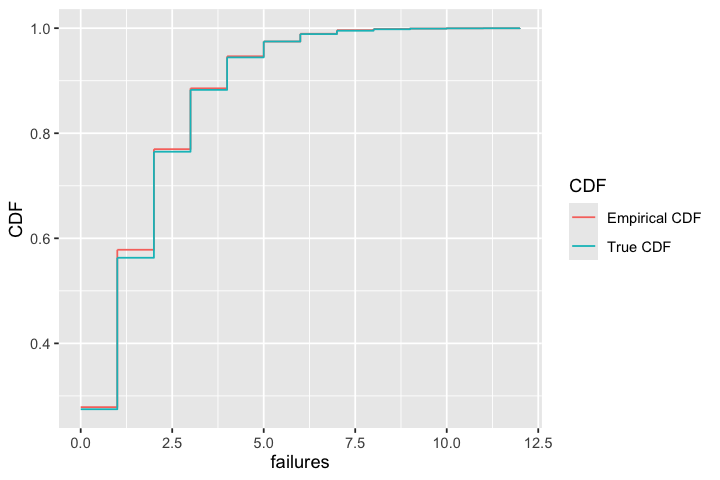

In [ ]:
(nb_tableau
 %>% pivot_longer(`True CDF`:`Empirical CDF`,
                  names_to = "CDF")
 %>% ggplot(aes(x = failures,
                y = value,
                color = CDF))
 + geom_step()
 + ylab("CDF")
 + labs(color = "CDF")
)

#### Probablity plot

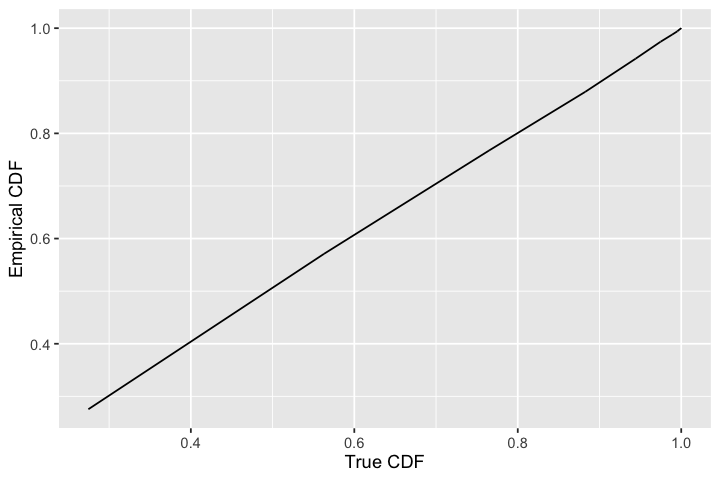

In [ ]:
(nb_tableau
 %>% ggplot(aes(x = `True CDF`,
                y = `Empirical CDF`))
 + geom_line()
)

### Example 2 - Roll a 4-sided die twice


- $X$ is the total roll
- $Y$ is max roll
- **Task 1:** Estimate probabilities
- **Task 2:** Tabulate estimated conditional probabilies

In [ ]:
N <- 10000
n <- 2
die <- 1:4

In [ ]:
(dice_tableau <-
 replicate(N, sample(die, n, replace = TRUE),
           .as = rolls)
 %>% mutate(max = map_int(rolls, max),
            sum = map_int(rolls, sum),
            `max is more than 3` = max > 3,
            `sum is 3` = sum == 3,
           )
) %>% head

.trial,rolls,max,sum,max is more than 3,sum is 3
<dbl>,<list>,<int>,<int>,<lgl>,<lgl>
1,"2, 3",3,5,FALSE,FALSE
2,"1, 2",2,3,FALSE,TRUE
3,"4, 4",4,8,TRUE,FALSE
4,"3, 4",4,7,TRUE,FALSE
5,"3, 4",4,7,TRUE,FALSE
6,"2, 1",2,3,FALSE,TRUE


**Estimate regular probabilities**

In [ ]:
(dice_tableau
 %>% estimate_all_prob
)

max is more than 3,sum is 3
<dbl>,<dbl>
0.4353,0.1248


#### Tabulate the conditional estimate

In [ ]:
(dice_tableau
 %>% group_by(max)
 %>% tabulate(sum)
) %>% round_tableau(3)

Adding missing grouping variables: `max`


max,X = 2,X = 3,X = 4,X = 5,X = 6,X = 7,X = 8
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.000,0.000,0.000,0.000,0.000,0.000
2,0,0.656,0.344,0.000,0.000,0.000,0.000
3,0,0.000,0.408,0.393,0.199,0.000,0.000
4,0,0.000,0.000,0.297,0.285,0.285,0.132


### Example 3 - Visualize order statistics

- Uniform IID samples
- Min and max
- Various $n$
- True distribution: beta

In [ ]:
N <- 100000

In [ ]:
# Small tableau for testing
(parameters(~n,
            2:3)
 %>% add_trials(2)
 %>% mutate(sample = map(n, \(n) runif(n)),
            min = map_dbl(sample, min),
            max = map_dbl(sample, max))
#  %>% pivot_longer(min:max, names_to = "stat")
#  %>% mutate(k = ifelse(stat == 'min', 1, n),
#            )
) %>% round_tableau

n,.trial,sample,min,max
<int>,<dbl>,<list>,<dbl>,<dbl>
2,1,"0.6192, 0.4065",0.4065,0.6192
2,2,"0.4381, 0.0633",0.0633,0.4381
3,1,"0.5552, 0.9176, 0.3127",0.3127,0.9176
3,2,"0.6084, 0.2094, 0.8070",0.2094,0.8070


In [ ]:
# Large tableau for simulation
(order_stats <-
 parameters(~n,
            1:6)
 %>% add_trials(N)
 %>% mutate(sample = map(n, \(n) runif(n)),
            min = map_dbl(sample, min),
            max = map_dbl(sample, max),
           )
 %>% pivot_longer(min:max, names_to = "stat")
 %>% mutate(k = ifelse(stat == 'min', 1, n),
            true_cdf = pbeta(value, k, n + 1 - k),
            emp_cdf = cume_dist(value),
            .by = c(n, stat),
           )
 %>% select(n, k, stat, value, true_cdf, emp_cdf)
) %>% head %>% round_tableau


n,k,stat,value,true_cdf,emp_cdf
<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1,min,0.4722,0.4722,0.4740
1,1,max,0.4722,0.4722,0.4740
1,1,min,0.6588,0.6588,0.6621
1,1,max,0.6588,0.6588,0.6621
1,1,min,0.7602,0.7602,0.7620
1,1,max,0.7602,0.7602,0.7620



#### Faceted Density plots

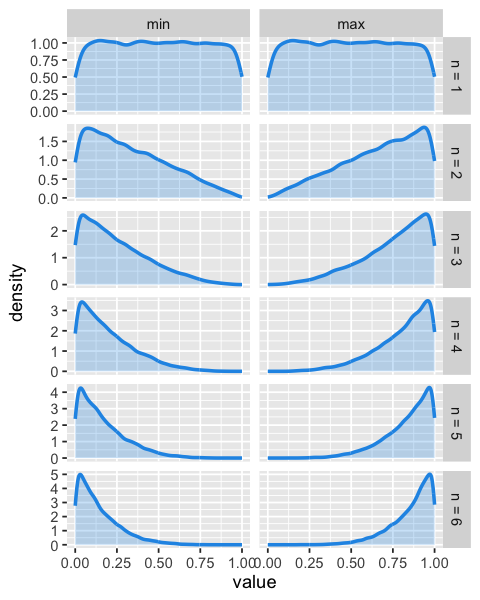

In [ ]:
(order_stats
 %>% mutate(`Sample Size` = str_glue('n = {n}'),
            stat = factor(stat, levels = c("min", "max")))
 %>% ggplot(aes(x = value))
 + geom_density(lwd = 1, colour = 4, fill = 4, alpha = 0.25)
 + facet_grid(rows = vars(`Sample Size`), cols = vars(stat), scales = "free_y")
)

####  Faceted Probability plot

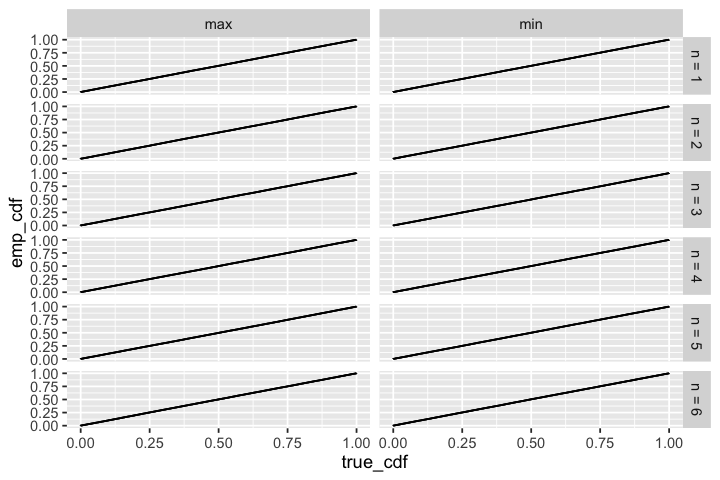

In [ ]:
(order_stats
 %>% mutate(`Sample Size` = str_glue('n = {n}'))
 %>% ggplot(aes(x = true_cdf, y = emp_cdf))
 + geom_line()
 + facet_grid(rows = vars(`Sample Size`), cols = vars(stat))
)

### Example 4 - Comparing two estimators

- $X\sim exp(\beta)$
- $\theta = \beta^2$
- $\hat{\theta}_1 = \frac{n}{n+1}\bar{X}^2$
- $\hat{\theta}_2 = S$

In [ ]:
 N <- 20000
get_exp <- \(n, b) rexp(n, 1/b)
t_hat_1 <- \(n, s) n/(n+1)*mean(s)^2

#### Experiment tableau

In [ ]:
(two_estimators <-
 parameters(~b,   ~n,
           1:4,  c(5, 10, 25, 50, 100))
  %>% add_trials(N)
  %>% mutate(sample = map2(n, b, get_exp),
             t_hat_1 = map2_dbl(n, sample, t_hat_1),
             t_hat_2 = map_dbl(sample, var),
             theta = b^2
            )
) %>% head %>% round_tableau(3)

b,n,.trial,sample,t_hat_1,t_hat_2,theta
<int>,<dbl>,<dbl>,<list>,<dbl>,<dbl>,<dbl>
1,5,1,"3.941, 0.791, 0.199, 0.017, 0.095",0.848,2.780,1
1,5,2,"0.893, 0.326, 0.721, 2.632, 2.057",1.465,0.948,1
1,5,3,"2.697, 0.239, 1.392, 0.800, 0.644",1.110,0.915,1
1,5,4,"0.453, 0.404, 0.142, 4.834, 0.334",1.267,4.065,1
1,5,5,"1.547, 1.110, 0.756, 0.361, 1.543",0.942,0.263,1
1,5,6,"0.856, 0.626, 0.038, 0.137, 2.366",0.540,0.877,1


#### Estimator summary table

In [ ]:
(two_estimators
  %>% select(-b)
  %>% pivot_longer(starts_with('t_hat'),
                   names_to = 'estimator',
                   values_to = 'beta_hat')
  %>% summarise(theta = mean(theta),
                avg = mean(beta_hat),
                Variance = var(beta_hat),
                .by = c(theta, n, estimator)
               )
  %>% mutate(Bias = avg - theta,
             MSPE = Variance + Bias^2)
  %>% select(-avg)
 -> exp_beta_sqr
) %>% head %>% round_tableau

theta,n,estimator,Variance,Bias,MSPE
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,5,t_hat_1,0.8355,-0.0070,0.8356
1,5,t_hat_2,1.6935,-0.0054,1.6935
1,10,t_hat_1,0.4248,0.0049,0.4248
1,10,t_hat_2,0.7965,0.0010,0.7965
1,25,t_hat_1,0.1636,0.0028,0.1637
1,25,t_hat_2,0.3086,-0.0019,0.3086


#### Comparing the estimator performance

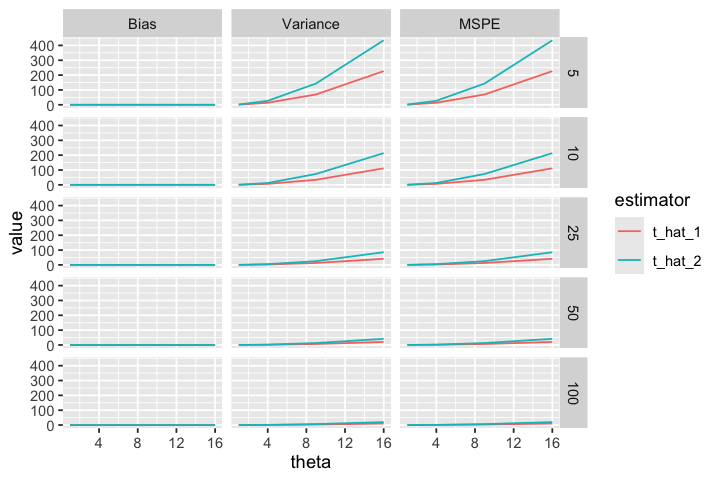

In [ ]:
(exp_beta_sqr
 %>% pivot_longer(cols = Variance:MSPE,
                  names_to = "metric")
 %>% mutate(metric = factor(metric,
                            levels = levels))
 %>% ggplot()
 + aes(x = theta, y = value, color = estimator)
 + geom_line()
 + facet_grid(rows = vars(n), cols = vars(metric))
)